In [1]:
import pandas as pd
import openpyxl
import numpy as np
import os
import glob2
import glob
import random
import sklearn
import ntpath
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from nltk.test.portuguese_en_fixt import setup_module
import nltk
from contextlib import nullcontext
import unicodedata
import plotly
import read_file_exec as rfe

## Puxada dos dados modelados do processo de extração

In [2]:
modelo_inventario = rfe.read_file('etl_results/tempo_em_estoque.xlsx').get_df()
modelo_transac_prod = rfe.read_file('etl_results/transacoes_produto_tratado_final.xlsx').get_df()

## Dados de Inventário

In [3]:
modelo_inventario


,codigo,descricao,categoria,estoque_disponivel,preco,incluido_em,alterado_em,ncm,taxa_depreciacao,ano_mes,...,clf_estoque,fator_atualizacao,depreciacao_unit,fator_correcao,correcao_unit,correcao_deprec,depreciacao,valor_ini,valor_estoque_deprec,valor_estoque_depreciado_corrigido
0,7100692,APLIQUE - APM4 -053 NOIVOS,papelaria,9.0,2.5,2020-11-16 17:19:42.000,2021-04-13 15:15:27.708,3926,0,2021-04,...,Produto no estoque,0.761290,0.000000,1.126423,2.816058,2.816058,0.000000,22.5,0.000000,0.000000
1,099939,MASSA BISCUIT acrilex 90G - AMARELO PELE,papelaria,0.0,4.5,2020-03-12 09:25:38.569,2021-04-13 14:54:44.957,3926,0,2021-04,...,Produto não está em estoque,1.000000,0.000000,1.126423,5.068904,5.068904,0.000000,0.0,0.000000,0.000000
2,099935,MASSA BISCUIT acrilex 90G - VERDE MUSGO,papelaria,0.0,4.5,2020-03-12 09:11:30.999,2021-04-13 14:55:19.701,3926,0,2021-04,...,Produto não está em estoque,1.000000,0.000000,1.126423,5.068904,5.068904,0.000000,0.0,0.000000,0.000000
3,099993,PINCEL TIGRE 815 - 04,papelaria,3.0,3.5,2020-03-12 16:23:51.521,2021-04-30 17:10:25.288,3926,0,2021-04,...,Produto no estoque,0.523590,0.000000,1.126423,3.942481,3.942481,0.000000,10.5,0.000000,0.000000
4,099996,PINCEL TIGRE 815 - 10,papelaria,4.0,5.0,2020-03-12 16:28:07.014,2021-04-30 17:11:11.816,3926,0,2021-04,...,Produto no estoque,0.523590,0.000000,1.126423,5.632116,5.632116,0.000000,20.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,7100714,PANO DE COPA NATAL PAPAI NOEL,enxoval,0.0,9.5,2020-11-24 10:09:39.995,2022-01-15 10:33:43.065,6303,20,2022-01,...,Produto não está em estoque,1.000000,0.000000,1.042070,9.899664,5.894360,0.000000,0.0,0.000000,0.000000
5117,099804,TNT AZUL,tecido,4.0,2.0,2020-03-07 08:19:00.682,2020-04-29 14:49:39.436,6303,20,2020-04,...,Produto no estoque,0.938286,0.053687,1.202562,2.405123,2.351436,0.214748,8.0,0.214748,0.258248
5118,123594,LÃ BADEN - 20 VERMELHO,la,4.0,22.0,2020-04-02 13:03:35.661,2020-04-02 13:03:35.661,6303,20,2020-04,...,Risco de estoque parado,1.000000,0.524315,1.202562,26.456354,25.932039,2.097261,88.0,2.097261,2.522085
5119,099599,LÃ COLORPULL 8663,la,0.0,30.0,2020-03-05 09:03:44.801,2020-04-29 14:47:21.646,6303,20,2020-04,...,Produto não está em estoque,1.000000,0.805307,1.202562,36.076847,35.271540,0.000000,0.0,0.000000,0.000000


In [4]:
modelo_transac_prod 

,tipo,numero,data,hora,produto,quant_,vl__unitario,sub_total,desconto,outras_despesas,gerado_clf_auto,total,codigo,categoria
0,Ajuste de Custo,38041,2022-07-20 17:40:01.564,2022-07-20 17:40:01.564,LINHA CLÉA 125 -5899 PANTANAL,0.0,9.25,0.0,0.0,0,S,0.0,85922412,linha
1,Ajuste de Estoque +,38040,2022-07-20 17:40:01.374,2022-07-20 17:40:01.374,LINHA CLÉA 125 -5899 PANTANAL,10.0,0.00,0.0,0.0,0,S,0.0,15042603,linha
2,Ajuste de Custo,36992,2022-06-16 10:35:44.146,2022-06-16 10:35:44.146,"AGULHA CROCHE LULI - 5,5",0.0,3.00,0.0,0.0,0,S,0.0,3456886,armarinho
3,Ajuste de Estoque +,36991,2022-06-16 10:35:43.968,2022-06-16 10:35:43.968,"AGULHA CROCHE LULI - 5,5",12.0,0.00,0.0,0.0,0,S,0.0,99629223,armarinho
4,Venda,36767,2022-06-09 10:42:36.640,2022-06-09 10:42:36.640,PAPEL DECOUPAGE-AFQ-032,-1.0,3.00,3.0,0.0,0,S,3.0,37013810,papelaria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47447,Ajuste de Estoque +,7,2020-02-03 13:31:23.044,2020-02-03 13:31:23.044,Linha Rayza - Cinza,9.0,0.00,0.0,0.0,0,N,0.0,98012,linha
47448,Ajuste de Custo,6,2020-02-03 13:29:52.455,2020-02-03 13:29:52.455,Linha Rayza - Laranja,0.0,5.50,0.0,0.0,0,N,0.0,98033,linha
47449,Ajuste de Estoque +,5,2020-02-03 13:29:52.440,2020-02-03 13:29:52.440,Linha Rayza - Laranja,5.0,0.00,0.0,0.0,0,N,0.0,98033,linha
47450,Ajuste de Custo,4,2020-02-03 13:27:48.967,2020-02-03 13:27:48.967,Linha Rayza - Verde Bandeira,0.0,5.50,0.0,0.0,0,N,0.0,98043,linha


<Figure size 640x480 with 0 Axes>

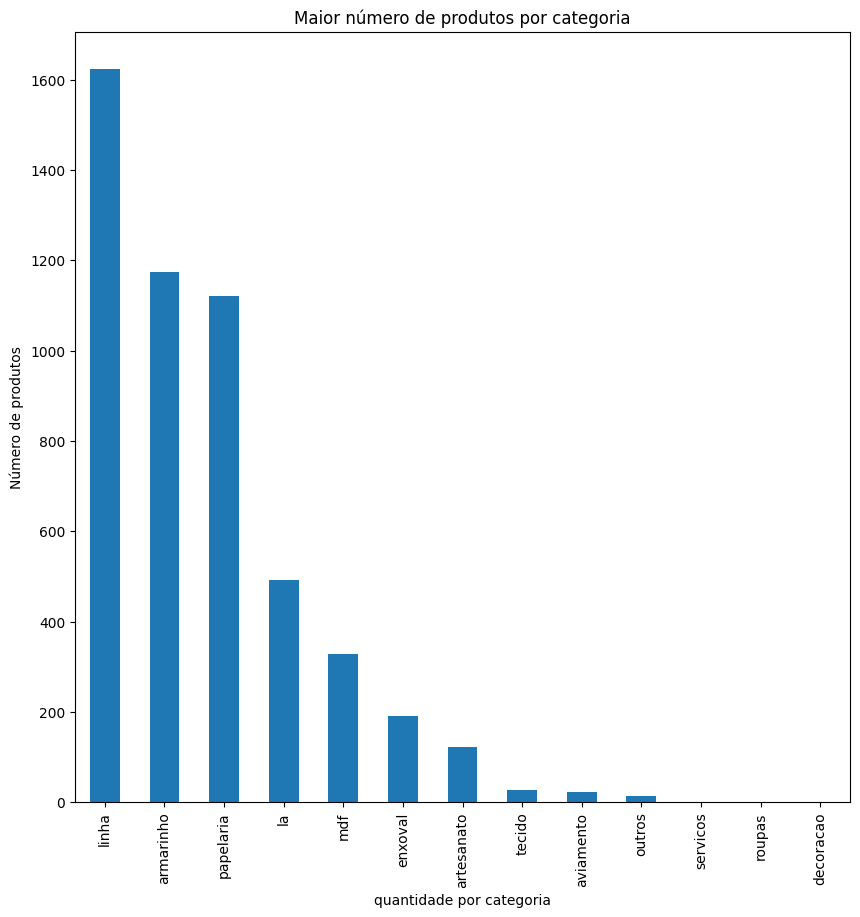

In [5]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots()

# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)


plot_rank_categoria = modelo_inventario['categoria'].value_counts().plot(kind='bar', title='Maior número de produtos por categoria',figsize=(10,10))
plot_rank_categoria.set_xlabel('quantidade por categoria')
plot_rank_categoria.set_ylabel('Número de produtos')
plt.show()

In [6]:
classificacao_inv = modelo_inventario.groupby('clf_estoque').agg({'categoria': 'nunique', 'codigo': 'count'})
classificacao_inv.head()

,categoria,codigo
clf_estoque,,
Produto alterado no último trimestre,10,186
Produto no estoque,9,3130
Produto não está em estoque,12,927
Risco de estoque parado,10,878


<Figure size 640x480 with 0 Axes>

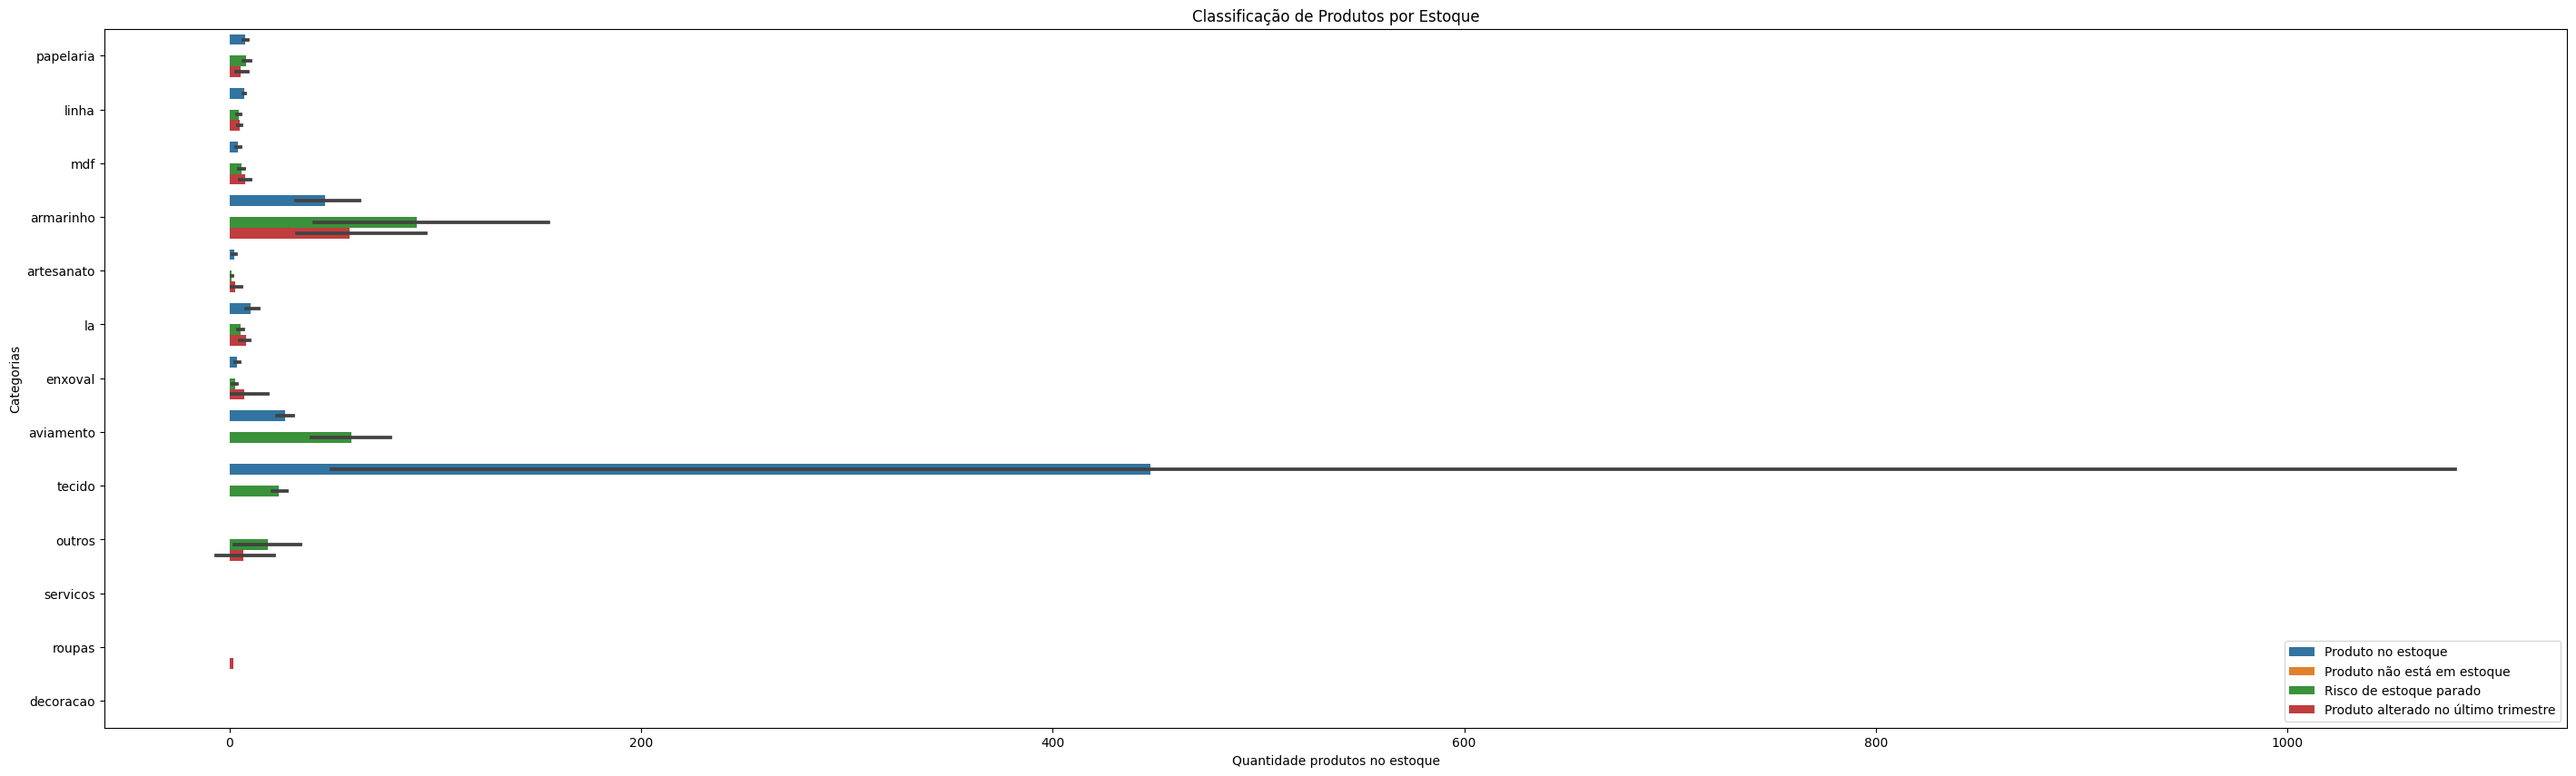

<Figure size 2000x2000 with 0 Axes>

In [7]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (35,10)
fig, ax = plt.subplots()

# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

#plot by clf_estoque from tempo_em_estoque

plot_classificacao_inv = sns.barplot(x='estoque_disponivel', y='categoria', data=modelo_inventario, hue='clf_estoque')
plot_classificacao_inv.set_xlabel('Quantidade produtos no estoque')
plot_classificacao_inv.set_ylabel('Categorias')
plot_classificacao_inv.set_title('Classificação de Produtos por Estoque')
plot_classificacao_inv.legend(loc='lower right')
plt.figure(figsize=(20,20))
plt.show()

In [8]:
tempo_em_estoque_parado = modelo_inventario[modelo_inventario['clf_estoque'] == 'Risco de estoque parado']
agrupamento_clf = tempo_em_estoque_parado.groupby(['categoria']).agg({'codigo': 'count','preco': 'mean','estoque_disponivel': 'mean'})
agrupamento_clf

,codigo,preco,estoque_disponivel
categoria,,,
armarinho,170,8.248882,90.878353
artesanato,16,92.062500,1.250000
aviamento,18,5.138889,59.472222
enxoval,23,56.260870,2.652174
la,18,32.600000,5.388889
linha,47,38.385106,4.595745
mdf,126,16.509127,5.801587
outros,4,17.325000,18.625000
papelaria,452,5.823230,8.265487


Será considerado uma análise dos itens classificados como "Risco de estoque parado".

In [9]:
agrupamento_risco = modelo_inventario[modelo_inventario['clf_estoque'] == 'Risco de estoque parado'].groupby(['clf_estoque','categoria']).agg({'codigo': 'count','preco': 'mean','estoque_disponivel': 'mean','te_inicio_presente': 'mean','te_atualizacao_presente': 'mean','te_inicio_atualizacao': 'mean','fator_atualizacao': 'mean','depreciacao': 'mean'})
for index, row in agrupamento_risco.iterrows():
    agrupamento_risco = agrupamento_risco.drop(index)
    

<Figure size 40x30 with 0 Axes>

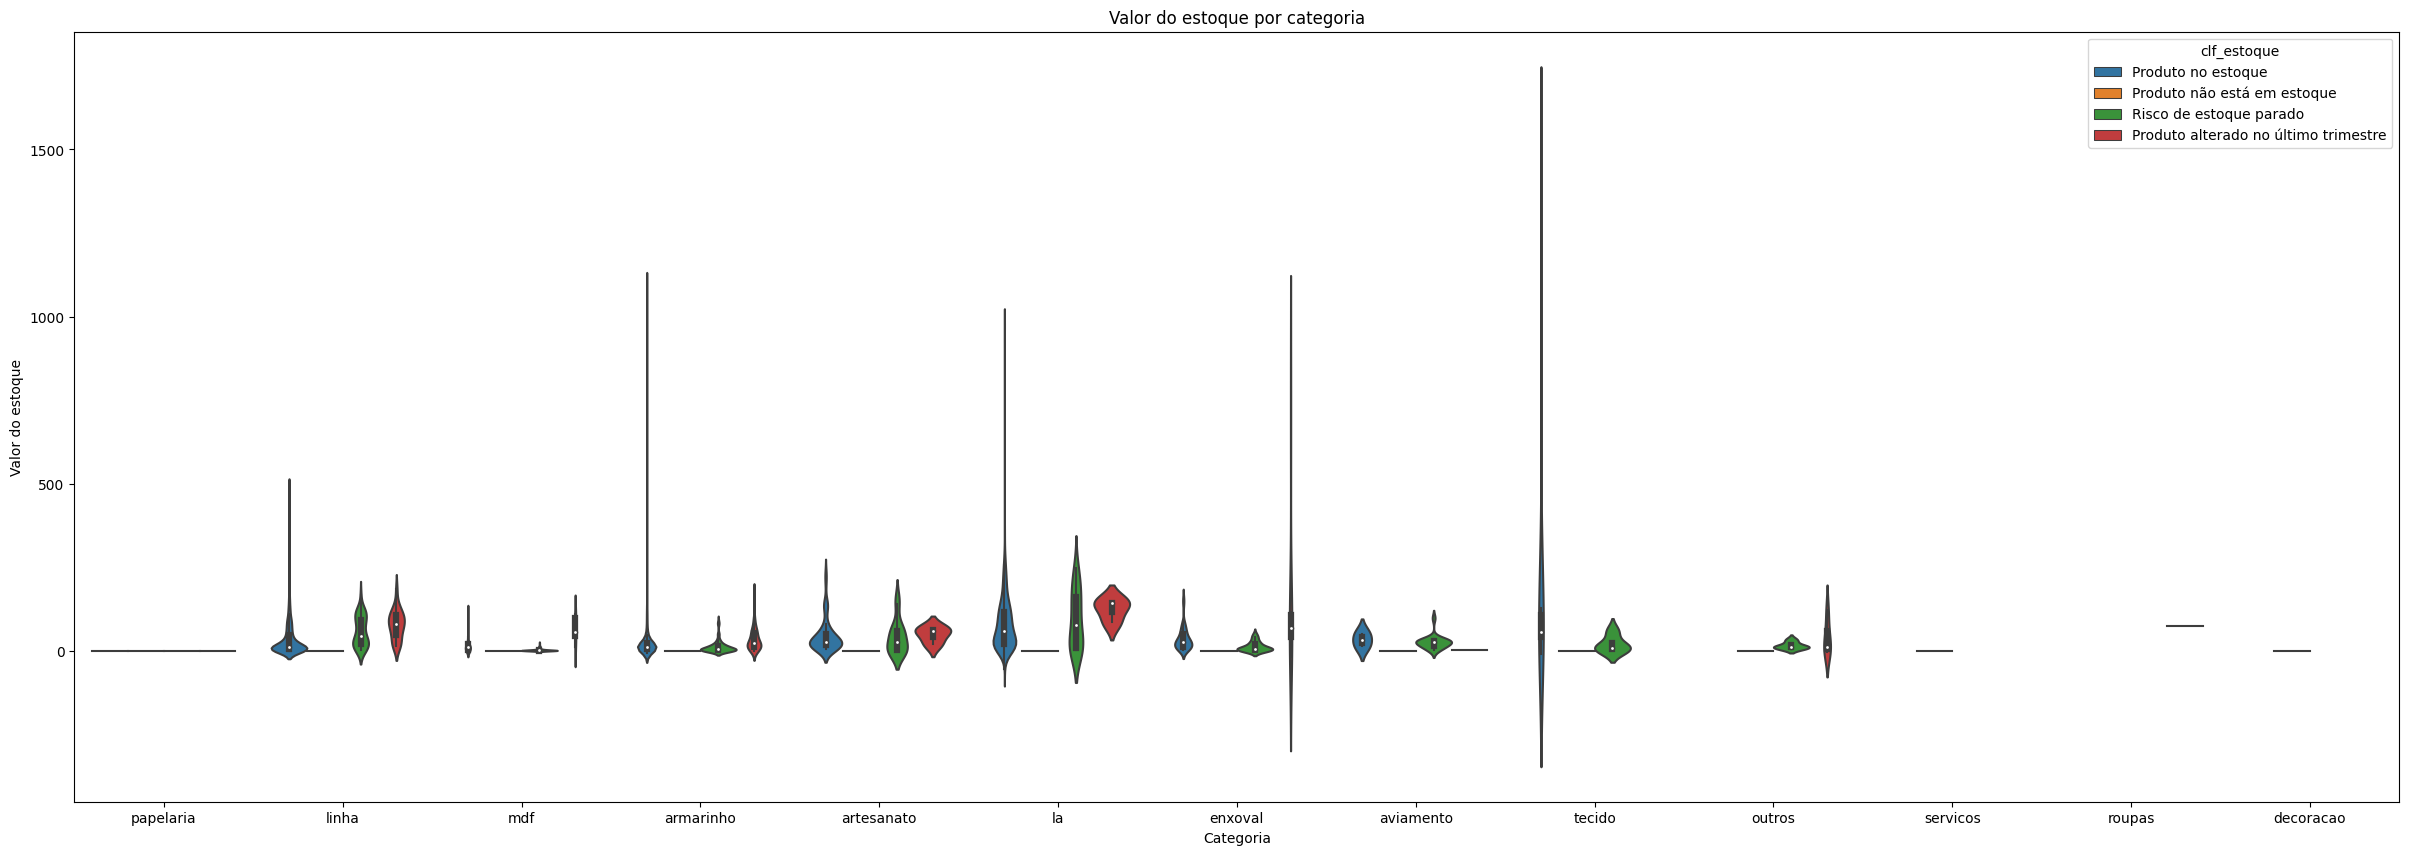

<Figure size 2000x2000 with 0 Axes>

In [10]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=5)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,10)
fig, ax = plt.subplots()

# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

b=sns.violinplot(x = 'categoria',y='valor_estoque_depreciado_corrigido', data=modelo_inventario, hue='clf_estoque')
b.set_xlabel('Categoria')
b.set_ylabel('Valor do estoque')
b.set_title('Valor do estoque por categoria')
plt.figure(figsize=(20,20))
plot_classificacao_inv.legend(loc='upper left')
plt.show()


In [11]:
#Rank de produtos em estoque por categoria com risco de estarem parados
top_10_fator_atualizacao_2 = modelo_inventario[modelo_inventario['fator_atualizacao'] == 1]
top_10_fator_atualizacao_2 = top_10_fator_atualizacao_2.sort_values(by=['fator_atualizacao'], ascending=False).groupby('clf_estoque')

top_10_fator_atualizacao_2[['categoria','descricao','estoque_disponivel','te_inicio_atualizacao','fator_atualizacao']].head(50)


,categoria,descricao,estoque_disponivel,te_inicio_atualizacao,fator_atualizacao
1,papelaria,MASSA BISCUIT acrilex 90G - AMARELO PELE,0.0,397,1.0
2958,linha,BARBANTE TRENTO - CINZA 270,0.0,795,1.0
2754,armarinho,"AGULHA CROCHÊ CIRCULO - 3,5",0.0,710,1.0
2753,armarinho,AGULHA CROCHÊ CIRCULO - 3,0.0,710,1.0
2745,armarinho,"AGULHA CROCHÊ MILWARD 5,5mm",0.0,0,1.0
...,...,...,...,...,...
1746,armarinho,RENDA GUIPEARE CHL 589 VERMELHO,13.7,0,1.0
1745,armarinho,RENDA GUIPEARE CHL 589 ROSA 5CM,17.0,0,1.0
1744,armarinho,RENDA GUIPEARE CHL 589 PRETA,27.4,0,1.0
1743,armarinho,RENDA GUIPEARE CHL - 438 PRETA,13.7,0,1.0


In [12]:
#g = sns.PairGrid(modelo_inventario, hue="categoria")
#g.map_diag(sns.histplot)
#g.map_offdiag(sns.scatterplot)
#g.add_legend()

In [13]:
#g = sns.PairGrid(modelo_inventario, hue="clf_estoque")
#g.map_diag(sns.histplot)
#g.map_offdiag(sns.scatterplot)
#g.add_legend()

In [14]:
#g = sns.PairGrid(modelo_inventario[modelo_inventario['clf_estoque'] == 'Risco de estoque parado'], hue='categoria')
#g.map_diag(sns.histplot)
#g.map_offdiag(sns.scatterplot)
#g.add_legend()

In [15]:
corr = modelo_inventario.corr()
corr.style.background_gradient(cmap='coolwarm')



,estoque_disponivel,preco,taxa_depreciacao,indice,te_inicio_presente,te_atualizacao_presente,te_inicio_atualizacao,anos_estoque,fator_atualizacao,depreciacao_unit,fator_correcao,correcao_unit,correcao_deprec,depreciacao,valor_ini,valor_estoque_deprec,valor_estoque_depreciado_corrigido
estoque_disponivel,1.000000,-0.048912,-0.021540,-0.005467,-0.049469,-0.002356,-0.040144,-0.002356,-0.007855,-0.021905,0.003261,-0.048682,-0.041923,0.112832,0.435573,0.169755,0.177522
preco,-0.048912,1.000000,0.216145,0.092176,-0.120110,-0.091029,-0.033117,-0.091029,0.049189,0.240378,-0.093877,0.998697,0.925785,0.028830,0.246303,0.180554,0.185590
taxa_depreciacao,-0.021540,0.216145,1.000000,0.226658,0.162022,-0.228193,0.309603,-0.228193,-0.188094,0.174365,-0.231518,0.210924,0.101674,0.153060,0.112504,0.244184,0.245432
indice,-0.005467,0.092176,0.226658,1.000000,-0.220137,-0.993137,0.563131,-0.993137,-0.634624,-0.212415,-0.998817,0.065239,-0.090831,-0.193983,0.167293,0.352635,0.349056
te_inicio_presente,-0.049469,-0.120110,0.162022,-0.220137,1.000000,0.225829,0.677535,0.225829,-0.108059,0.105283,0.215574,-0.109936,-0.043739,0.106955,-0.114973,-0.136382,-0.135817
te_atualizacao_presente,-0.002356,-0.091029,-0.228193,-0.993137,0.225829,1.000000,-0.563482,1.000000,0.633700,0.196041,0.995289,-0.064188,0.088819,0.178207,-0.168748,-0.345096,-0.341982
te_inicio_atualizacao,-0.040144,-0.033117,0.309603,0.563131,0.677535,-0.563482,1.000000,-0.563482,-0.570013,-0.058740,-0.568620,-0.044755,-0.104150,-0.043948,0.029907,0.144914,0.143041
anos_estoque,-0.002356,-0.091029,-0.228193,-0.993137,0.225829,1.000000,-0.563482,1.000000,0.633700,0.196041,0.995289,-0.064188,0.088819,0.178207,-0.168748,-0.345096,-0.341982
fator_atualizacao,-0.007855,0.049189,-0.188094,-0.634624,-0.108059,0.633700,-0.570013,0.633700,1.000000,0.157623,0.631223,0.063531,0.139196,0.045135,-0.213566,-0.356525,-0.353699
depreciacao_unit,-0.021905,0.240378,0.174365,-0.212415,0.105283,0.196041,-0.058740,0.196041,0.157623,1.000000,0.206940,0.266818,0.362237,0.350852,-0.009473,-0.069726,-0.067712


Devido à baixa correlação presente na massa de dados, O trabalho passa a considerar os dados de Transação de produtos para a análise do modelo.



## DataFrame de Produtos

In [16]:
tipo_transf = modelo_transac_prod.tipo.unique()
tipo_transf

array(['Ajuste de Custo', 'Ajuste de Estoque +', 'Venda',
       'Ajuste de Estoque -', 'Devolução do Cliente'], dtype=object)

In [17]:
modelo_transac_prod['tipo'].value_counts()

Venda                   19997
Ajuste de Custo         13501
Ajuste de Estoque +      8984
Ajuste de Estoque -      4967
Devolução do Cliente        3
Name: tipo, dtype: int64

### Dados de Venda

In [37]:
modelo_transac_prod_vendas = modelo_transac_prod[modelo_transac_prod['tipo'] == 'Venda']
modelo_transac_prod_vendas['quant_'] = modelo_transac_prod_vendas['quant_']*-1
modelo_transac_prod_vendas


,tipo,numero,data,hora,produto,quant_,vl__unitario,sub_total,desconto,outras_despesas,gerado_clf_auto,total,codigo,categoria
4,Venda,36767,2022-06-09 10:42:36.640,2022-06-09 10:42:36.640,PAPEL DECOUPAGE-AFQ-032,1.0,3.0,3.0,0.00,0,S,3.00,37013810,papelaria
5,Venda,36547,2022-06-03 09:31:31.703,2022-06-03 09:31:31.703,BASTIDOR MDF - 18CM,1.0,8.5,8.5,0.00,0,S,8.50,32968828,mdf
6,Venda,36426,2022-05-30 16:24:04.069,2022-05-30 16:24:04.069,FRALDA BOCA NICOLI - ROSA,2.0,4.8,9.6,0.00,0,S,9.60,30058838,enxoval
7,Venda,36392,2022-05-28 10:42:32.680,2022-05-28 10:42:32.680,"AGULHA CROCHÊ ESMALTADA - 2,5M",1.0,7.0,7.0,0.22,0,S,6.78,18828463,armarinho
8,Venda,36367,2022-05-27 14:08:31.247,2022-05-27 14:08:31.247,"AGULHA CROCHÊ MILWARD 5,5 mm",1.0,7.0,7.0,0.69,0,S,6.31,98947493,armarinho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36476,Venda,11638,2020-09-13 16:46:32.133,2020-09-13 16:46:32.133,Linha Rayza - Lilás,2.0,8.5,17.0,0.00,0,N,17.00,98006,linha
36477,Venda,11637,2020-09-13 16:45:49.784,2020-09-13 16:45:49.784,COSTURA DRIMA - 6104,1.0,2.0,2.0,0.00,0,N,2.00,7099730,linha
36478,Venda,11637,2020-09-13 16:45:49.784,2020-09-13 16:45:49.784,COSTURA DRIMA - 5878,1.0,2.0,2.0,0.00,0,N,2.00,N126100-005876,linha
36479,Venda,11637,2020-09-13 16:45:49.784,2020-09-13 16:45:49.784,COSTURA DRIMA - PT,1.0,2.0,2.0,0.00,0,N,2.00,098930,linha


In [19]:
modelo_transac_prod_vendas = modelo_transac_prod_vendas.groupby(['numero','categoria','data']).agg({'quant_': 'sum','total':'sum'}).reset_index()
modelo_transac_prod_vendas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12172 entries, 0 to 12171
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   numero     12172 non-null  int64         
 1   categoria  12172 non-null  object        
 2   data       12172 non-null  datetime64[ns]
 3   quant_     12172 non-null  float64       
 4   total      12172 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 475.6+ KB


In [20]:
#modelo_transac_prod_vendas normalize quant_ field
modelo_transac_prod_vendas['qtd_norm'] = (modelo_transac_prod_vendas['quant_'] - modelo_transac_prod_vendas['quant_'].min())/ (modelo_transac_prod_vendas['quant_'].max() - modelo_transac_prod_vendas['quant_'].min())
modelo_transac_prod_vendas['data_dia'] = modelo_transac_prod_vendas['data'].dt.date 

In [21]:
#ajustando o campo data para o formato datetime para poder fazer o agrupamento
modelo_transac_prod_vendas_diario = modelo_transac_prod_vendas[['numero','categoria','data_dia','quant_','qtd_norm','total']].sort_values(by=['data_dia'], ascending=True)

In [22]:
modelo_transac_prod_vendas_diario 



,numero,categoria,data_dia,quant_,qtd_norm,total
0,11637,linha,2020-09-13,4000.0,0.003988,8.00
15,11654,tecido,2020-09-13,2000.0,0.001988,12.00
14,11651,armarinho,2020-09-13,4000.0,0.003988,0.80
12,11649,armarinho,2020-09-13,4000.0,0.003988,6.00
11,11648,armarinho,2020-09-13,1000.0,0.000988,10.00
...,...,...,...,...,...,...
12156,38237,la,2022-07-29,1000.0,0.000988,6.80
12170,38252,armarinho,2022-07-30,100000.0,0.099989,28.00
12168,38251,armarinho,2022-07-30,1000.0,0.000988,5.80
12169,38251,linha,2022-07-30,2000.0,0.001988,6.00


<Figure size 640x480 with 0 Axes>

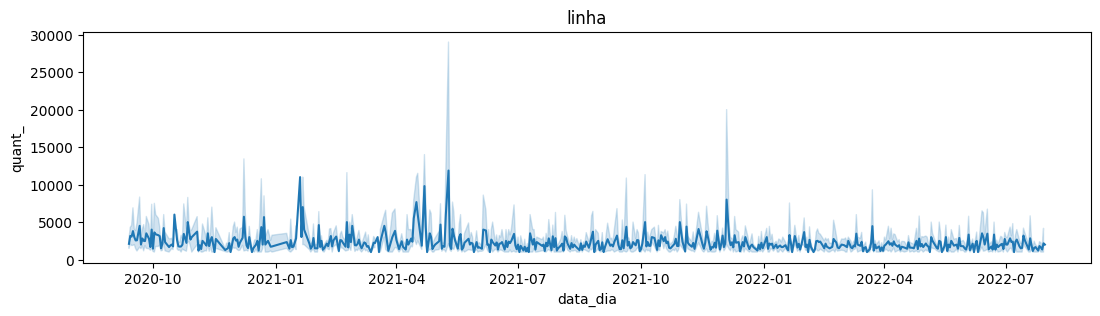

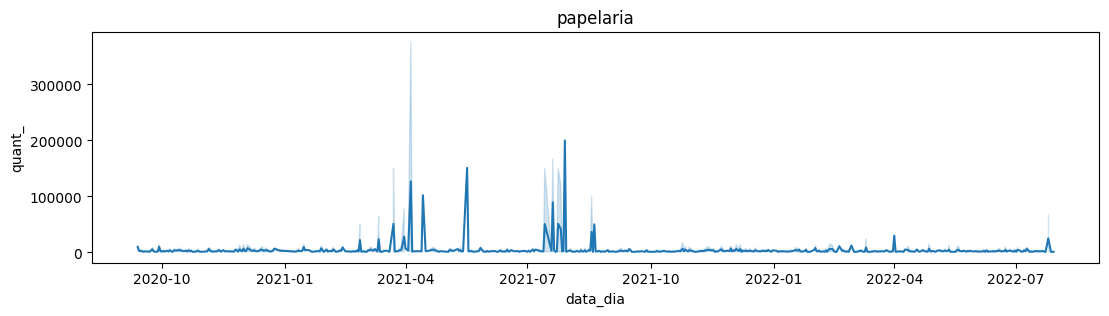

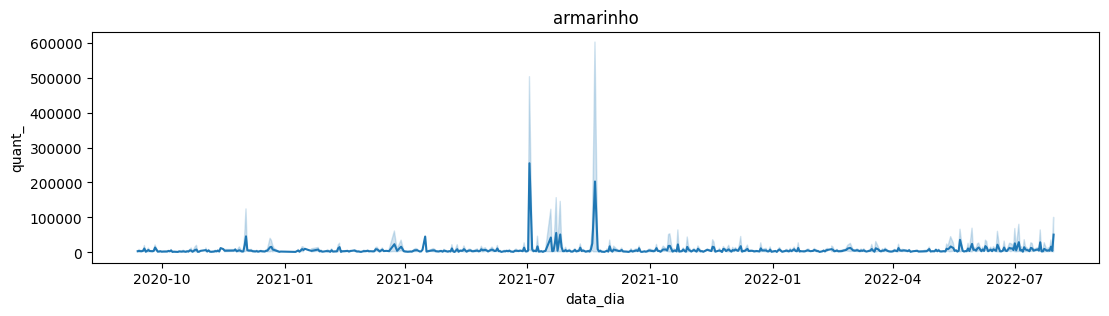

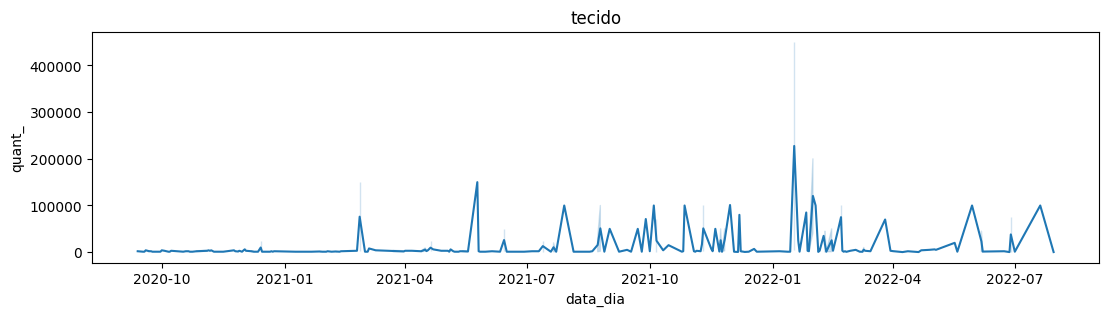

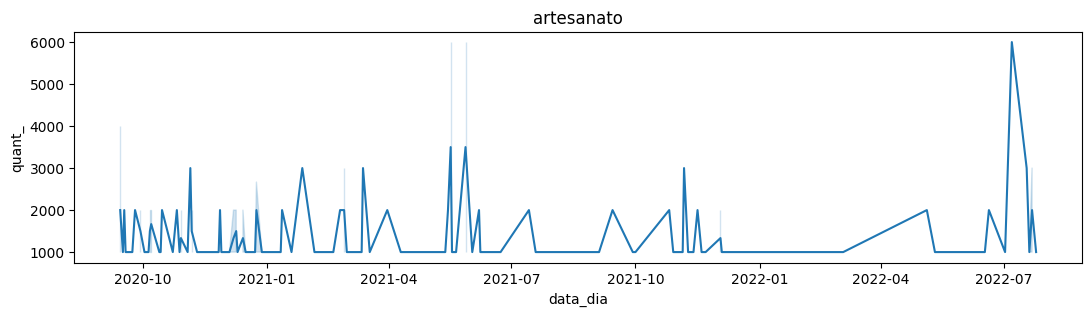

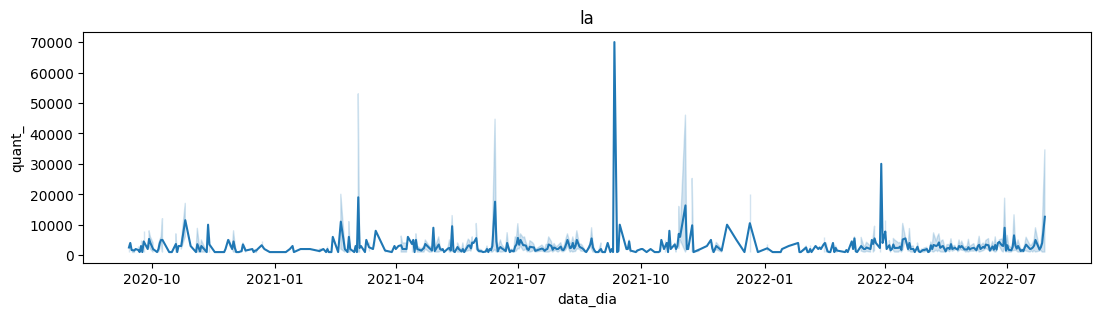

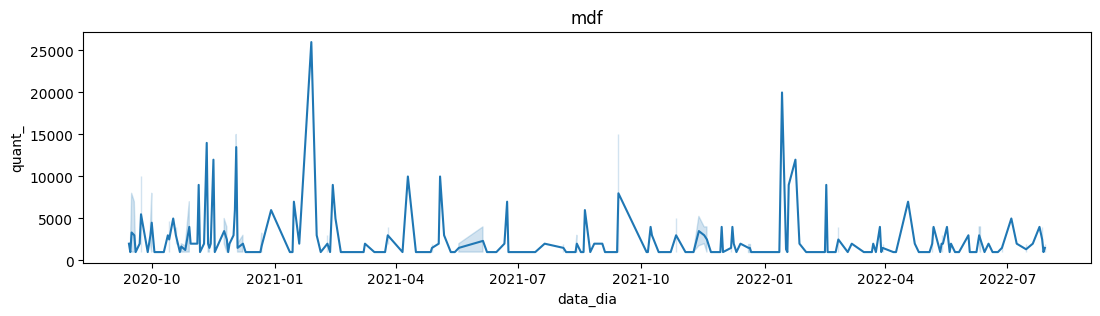

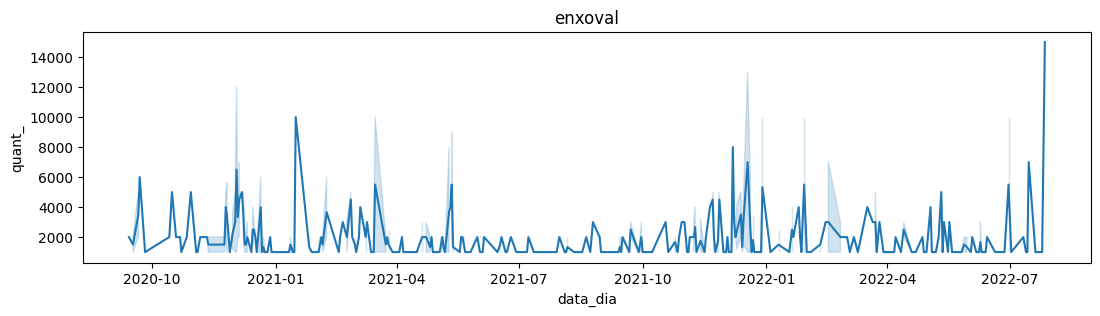

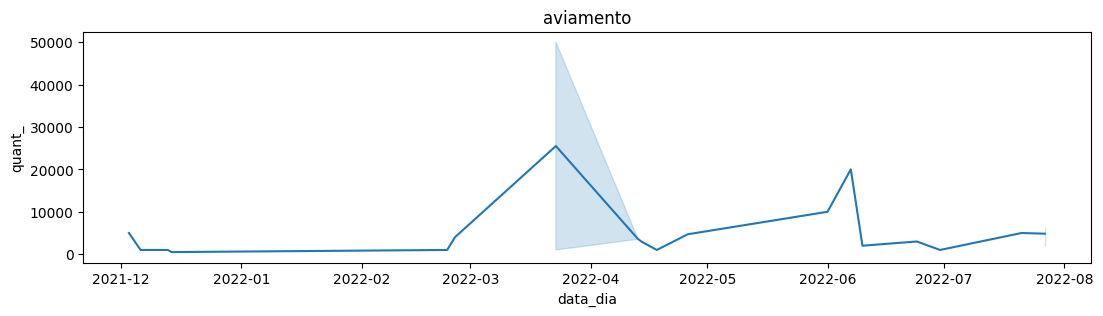

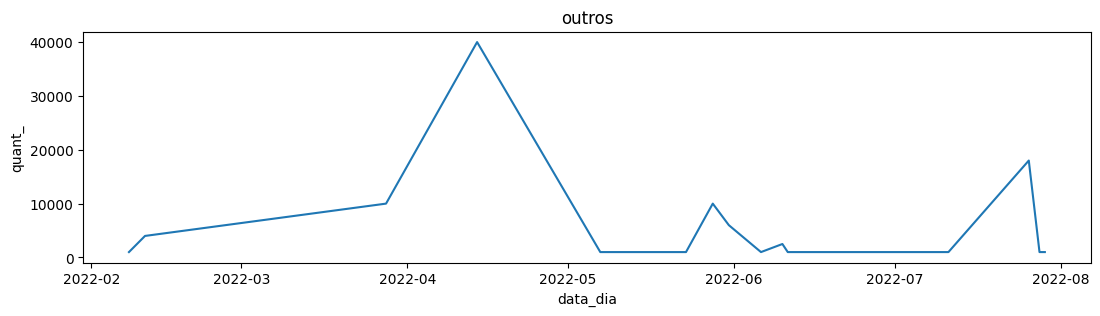

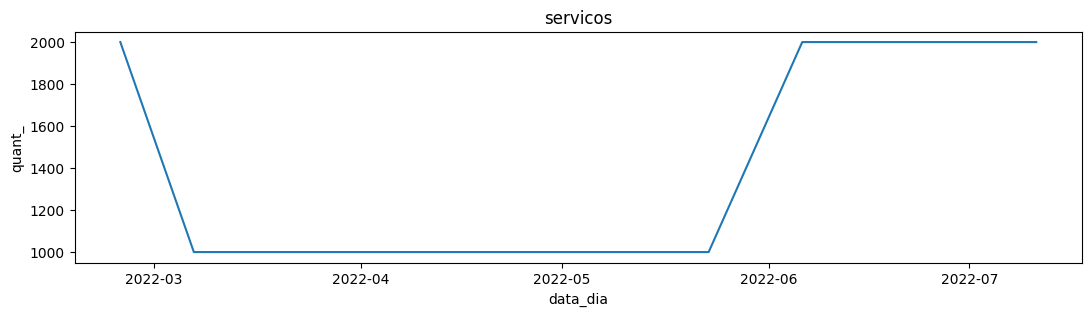

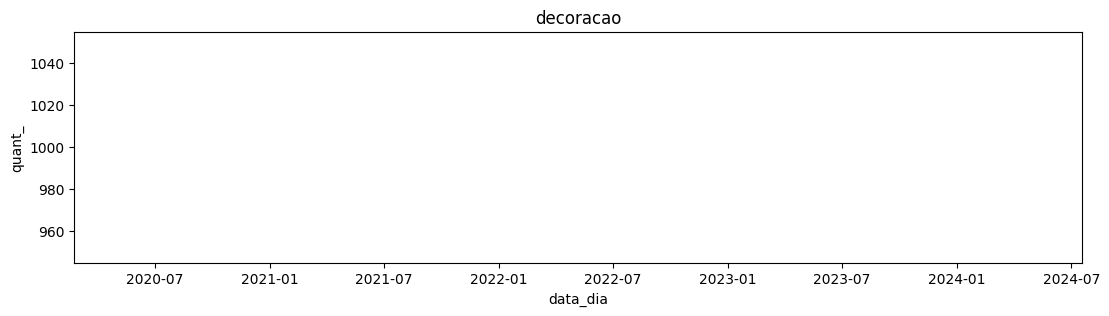

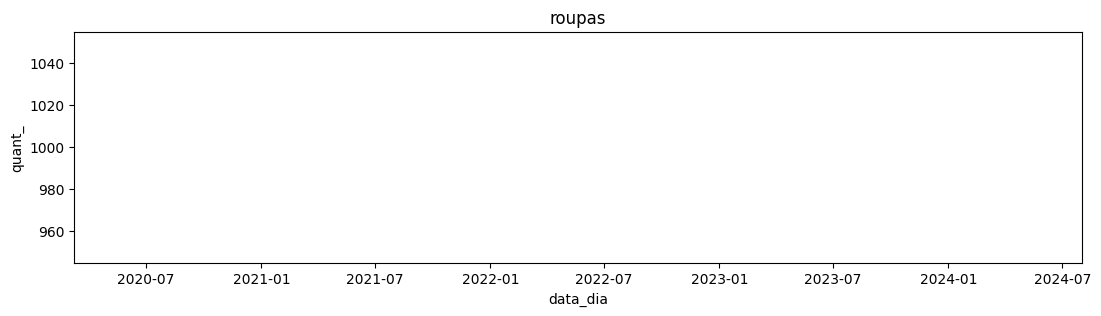

In [23]:
#sns timeplot hue categoria dataframe_transacoes_produto_tratado_2 by venda and data
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (13,3)
fig, ax = plt.subplots()
#create a time plot 
for categoria in modelo_transac_prod_vendas['categoria'].unique():
    modelo_transac_prod_vendas_categoria =modelo_transac_prod_vendas_diario[modelo_transac_prod_vendas_diario['categoria'] == categoria]
    sns.lineplot(x='data_dia', y=(modelo_transac_prod_vendas_categoria['quant_']), data=modelo_transac_prod_vendas_diario)
    plt.title(categoria)
    plt.show()




In [24]:
modelo_transac_prod_vendas_diario_ajust = modelo_transac_prod_vendas_diario.query("categoria != 'roupas' | categoria != 'decoracao' | categoria != 'servicos' | categoria != 'outros' ")

In [36]:
modelo_transac_prod_vendas_diario_ajust

,numero,categoria,data_dia,quant_,qtd_norm,total
0,11637,linha,2020-09-13,4000.0,0.003988,8.00
15,11654,tecido,2020-09-13,2000.0,0.001988,12.00
14,11651,armarinho,2020-09-13,4000.0,0.003988,0.80
12,11649,armarinho,2020-09-13,4000.0,0.003988,6.00
11,11648,armarinho,2020-09-13,1000.0,0.000988,10.00
...,...,...,...,...,...,...
12156,38237,la,2022-07-29,1000.0,0.000988,6.80
12170,38252,armarinho,2022-07-30,100000.0,0.099989,28.00
12168,38251,armarinho,2022-07-30,1000.0,0.000988,5.80
12169,38251,linha,2022-07-30,2000.0,0.001988,6.00


In [25]:
from IPython.display import display

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(42)

In [35]:
#sns timeplot hue categoria dataframe_transacoes_produto_tratado_2 by venda and data
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (13,3)
fig, ax = plt.subplots()
#create a time plot 
for categoria in modelo_transac_prod_vendas['categoria'].unique():
    modelo_transac_prod_vendas_categoria =modelo_transac_prod_vendas_diario[modelo_transac_prod_vendas_diario['categoria'] == categoria]
    sns.lineplot(x='data_dia', y=(modelo_transac_prod_vendas_categoria['quant_']), data=modelo_transac_prod_vendas_diario)
    plt.title(categoria)
    plt.show()




a

NameError: name 'lim_catfish_sales' is not defined